<a href="https://colab.research.google.com/github/zhuchangyan/Multimode-fiber-Image-reconstruction/blob/master/Dense_autoencoder.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from keras.layers import Input, Dense , Dropout
from keras.models import Model
import pickle
import numpy as np

Using TensorFlow backend.


In [2]:
cd /content/drive/My Drive/Colab Notebooks/MMF data/


/content/drive/My Drive/Colab Notebooks/MMF data


In [3]:
cd Mnist\ image\ data

/content/drive/My Drive/Colab Notebooks/MMF data/Mnist image data


In [0]:
with open('resize_10000.dat','rb') as f:
  imgs = pickle.load(f)

with open('resize_10000_SLM.dat','rb') as f:
  origins = pickle.load(f)

In [0]:
for i in range(10000):
  imgs[i] = imgs[i].flatten()
  origins[i] = origins[i].flatten()

In [0]:
train_imgs = []
train_origins = []

test_imgs = []
test_origins =[]

for i in range(8000):
  train_imgs.append(imgs[i])
  train_origins.append(origins[i])

for i in range(8000,10000):
  test_imgs.append(imgs[i])
  test_origins.append(origins[i])



Set up neural network

In [7]:
input_img = Input(shape = (784,))

encoded = Dense(128, activation='relu')(input_img)
encoded = Dense(64, activation='relu')(encoded)
encoded = Dense(32, activation='relu')(encoded)

decoded = Dense(64, activation='relu')(encoded)
decoded = Dense(128, activation='relu')(decoded)
decoded = Dense(784, activation='sigmoid')(decoded)


autoencoder = Model(input_img, decoded)

In [0]:
encoder = Model(input_img, encoded)

In [9]:
autoencoder.compile(optimizer = 'adadelta', loss = 'binary_crossentropy')



Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [10]:
from keras.datasets import mnist
import numpy as np

train_imgs = np.array(train_imgs).astype('float32') / 255.
train_origins = np.array(train_origins).astype('float32') / 255.

test_imgs = np.array(test_imgs).astype('float32') / 255.
test_origins = np.array(test_origins).astype('float32') / 255.


print (train_imgs.shape)
print (test_imgs.shape)

(8000, 784)
(2000, 784)


In [11]:
autoencoder.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 784)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               100480    
_________________________________________________________________
dense_2 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_3 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_4 (Dense)              (None, 64)                2112      
_________________________________________________________________
dense_5 (Dense)              (None, 128)               8320      
_________________________________________________________________
dense_6 (Dense)              (None, 784)               1011

In [12]:
autoencoder.fit(train_origins, train_origins,
                epochs=30,
                batch_size=256,
                shuffle=True,
                validation_data=(test_origins, test_origins))




Train on 8000 samples, validate on 2000 samples
Epoch 1/30





8000/8000 [==============================] - 1s 130us/step - loss: 0.6876 - val_loss: 0.6760
Epoch 2/30
8000/8000 [==============================] - 1s 84us/step - loss: 0.4625 - val_loss: 0.2892
Epoch 3/30
8000/8000 [==============================] - 1s 82us/step - loss: 0.2741 - val_loss: 0.2827
Epoch 4/30
8000/8000 [==============================] - 1s 87us/step - loss: 0.2700 - val_loss: 0.2797
Epoch 5/30
8000/8000 [==============================] - 1s 81us/step - loss: 0.2679 - val_loss: 0.2794
Epoch 6/30
8000/8000 [==============================] - 1s 82us/step - loss: 0.2663 - val_loss: 0.2774
Epoch 7/30
8000/8000 [==============================] - 1s 82us/step - loss: 0.2650 - val_loss: 0.2776
Epoch 8/30
8000/8000 [==============================] - 1s 81us/step - loss: 0.2638 - val_loss: 0.2737
Epoch 9/30
8000/8000 [==============================] - 1s 81us/step - loss: 0.2623 - val_loss: 0.2730
Epoch 10/30
8000

In [0]:
decoded_imgs = autoencoder.predict(test_origins)


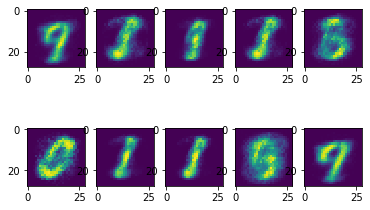

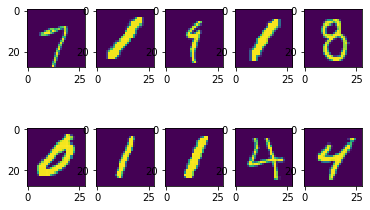

In [14]:
import matplotlib.pyplot as plt

images = decoded_imgs.reshape(-1,28,28)

for i in range(10):
  plt.subplot(2,5,i+1)
  plt.imshow(images[i])
plt.show()

for i in range(10):
  plt.subplot(2,5,i+1)
  plt.imshow(test_origins[i].reshape(28,28))
plt.show()